In [57]:
import pandas as pd
import numpy as np
# URL de la hoja de Excel
url = "https://github.com/santiagonajera/Finanzas-Riesgos/raw/refs/heads/main/EvalFinanciera-Riesgos.xlsx"
# Leer la hoja de Excel desde la URL
df = pd.read_excel(url, sheet_name=0)
# Seleccionar solo las celdas A4:B7
inversiones = df.iloc[3:6, 0:2]
# Seleccionar solo la celda B9
tasa_descuento = df.loc[7, 0]  # Utiliza el índice 1 para seleccionar la segunda columna
#
# Seleccionar las unidades vendidas de la fila 10
unidades_vendidas = df.iloc[10, 1:]
# Seleccionar los precios de la fila 11
precios = df.iloc[11, 1:]
IngresoTotal=unidades_vendidas*precios
IngresoTotal.sum()

6489670.527999999

In [59]:
# Número de simulaciones
num_simulaciones = 1000

# Lista para almacenar los resultados de las simulaciones
resultados_simulaciones = []

for _ in range(num_simulaciones):
    # Generar variabilidad en unidades vendidas (20% menos a 10% más)
    variabilidad = np.random.uniform(0.8, 1.1, size=unidades_vendidas.shape)
    unidades_vendidas_variadas = unidades_vendidas * variabilidad

    # Calcular el ingreso total con la variabilidad
    IngresoTotal = unidades_vendidas_variadas * precios
    resultados_simulaciones.append(IngresoTotal.sum())

# Convertir los resultados a un DataFrame para análisis
resultados_df = pd.DataFrame(resultados_simulaciones, columns=['Ingreso Total'])

resultados_df.describe()

Ingreso Total
count   1.000000e+03
mean    6.172827e+06
std     1.973311e+05
min     5.604158e+06
25%     6.038219e+06
50%     6.180397e+06
75%     6.309329e+06
max     6.699159e+06

In [109]:

#costos fijo
Arriendos = df.iloc[15, 1:]
Sueldos = df.iloc[16, 1:]
Servicios_varios = df.iloc[17, 1:]
TOTAL_COSTOS_FIJOS = Arriendos + Sueldos + Servicios_varios
TOTAL_COSTOS_FIJOS

# Costos variables
Frutos_secos = df.iloc[21, 1:]
Proteina = df.iloc[22, 1:]
Insumos = df.iloc[23, 1:]
Empaques = df.iloc[24, 1:]

In [113]:
# Suponiendo que 'df' es tu DataFrame y 'Merma' es la serie que quieres modificar
Merma = df.iloc[26, 1:]

# Inicializar el primer valor
Merma.iloc[1] = 0.05

# Número de simulaciones
num_simulaciones = 1000

# Lista para almacenar los resultados de las simulaciones
resultados_simulaciones = []

for _ in range(num_simulaciones):
    # Crear una copia de la serie Merma para cada simulación
    Merma_simulada = Merma.copy()
    
    # Aplicar la disminución del 10% fila a fila con variabilidad
    for i in range(2, len(Merma_simulada)):
        variabilidad = np.random.uniform(0.9, 1.1)  # Variabilidad entre 90% y 110%
        Merma_simulada.iloc[i] = max(Merma_simulada.iloc[i-1] * 0.9 * variabilidad, 0.01)
    
    # Almacenar la serie simulada en la lista de resultados
    resultados_simulaciones.append(Merma_simulada.values)

# Convertir los resultados a un DataFrame para análisis
resultados_df = pd.DataFrame(resultados_simulaciones)

# Mostrar estadísticas descriptivas de las simulaciones
print(resultados_df.describe())

        0             1            2            3            4            5   \
count  0.0  1.000000e+03  1000.000000  1000.000000  1000.000000  1000.000000   
mean   NaN  5.000000e-02     0.045046     0.040691     0.036464     0.032702   
std    NaN  7.081213e-16     0.002529     0.003256     0.003642     0.003695   
min    NaN  5.000000e-02     0.040503     0.032958     0.027049     0.023316   
25%    NaN  5.000000e-02     0.042947     0.038424     0.033851     0.029933   
50%    NaN  5.000000e-02     0.044968     0.040565     0.036294     0.032628   
75%    NaN  5.000000e-02     0.047310     0.043021     0.038819     0.035288   
max    NaN  5.000000e-02     0.049466     0.048660     0.046702     0.045283   

                6            7            8            9            10  
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  
mean      0.029474     0.026587     0.023949     0.021586     0.019379  
std       0.003639     0.003724     0.003649     0.003574   

In [4]:
import pandas as pd
import numpy as np
# URL de la hoja de Excel
url = "https://github.com/santiagonajera/Finanzas-Riesgos/raw/refs/heads/main/EvalFinanciera-Riesgos.xlsx"
# Leer la hoja de Excel desde la URL
df = pd.read_excel(url, sheet_name=0)
# Seleccionar solo las celdas A4:B7
inversiones = df.iloc[3:6, 0:2]
inversiones

Unnamed: 0       0
3   Equipamiento  600000
4  Instalaciones  200000
5    Maquinarias  100000

In [6]:
import pandas as pd
import numpy as np
from scipy.stats import triang, norm, weibull_min
import matplotlib.pyplot as plt

# URL de la hoja de Excel
url = "https://github.com/santiagonajera/Finanzas-Riesgos/raw/refs/heads/main/EvalFinanciera-Riesgos.xlsx"

# Leer la hoja de Excel desde la URL
df = pd.read_excel(url, sheet_name=0)

# Seleccionar solo las celdas A4:B7
inversiones = df.iloc[3:6, 0:2]

# Definir las distribuciones para cada variable
distribuciones = []
for index, fila in inversiones.iterrows():
    distribucion = {}
    distribucion['nombre'] = fila[0]  # Tomar el nombre de la variable desde la primera columna
    if index == 3:  # Primera fila
        distribucion['distribucion'] = triang
        distribucion['args'] = (fila[1], fila[1], fila[1])  # c, loc, scale
    elif index == 4:  # Segunda fila
        distribucion['distribucion'] = norm
        distribucion['args'] = (fila[1], fila[1])  # loc, scale
    elif index == 5:  # Tercera fila
        distribucion['distribucion'] = weibull_min
        distribucion['args'] = (fila[1], fila[1])  # c, scale
    distribuciones.append(distribucion)

# Realizar 1000 simulaciones para cada variable
simulaciones = {}
for distribucion in distribuciones:
    simulaciones[distribucion['nombre']] = distribucion['distribucion'](*distribucion['args']).rvs(1000)

# Calcular el monto de inversión para cada simulación
montos_inversion = np.sum([simulaciones[var] for var in simulaciones], axis=0)

# Calcular la media y la desviación estándar del monto de inversión
media_monto = np.mean(montos_inversion)
std_monto = np.std(montos_inversion)

print(f"Media del monto de inversión: {media_monto:.2f}")
print(f"Desviación estándar del monto de inversión: {std_monto:.2f}")

# Análisis de sensibilidad
sensibilidad = {}
for var in simulaciones:
    sensibilidad[var] = np.std(montos_inversion - simulaciones[var] + np.mean(simulaciones[var]))

print("Análisis de sensibilidad:")
for var, valor in sensibilidad.items():
    print(f"{var}: {valor:.2f}")

# Variable con mayor impacto
var_mayor_impacto = max(sensibilidad, key=sensibilidad.get)
print(f"Variable con mayor impacto: {var_mayor_impacto}")

# Gráfica de los resultados
plt.hist(montos_inversion, bins=50, alpha=0.5, label='Monto de inversión')
plt.xlabel('Monto de inversión')
plt.ylabel('Frecuencia')
plt.title('Distribución del monto de inversión')
plt.legend()
plt.show()

KeyError: 1

In [10]:
import pandas as pd
import numpy as np
import scipy.stats as stats

# URL de la hoja de Excel
url = "https://github.com/santiagonajera/Finanzas-Riesgos/raw/refs/heads/main/EvalFinanciera-Riesgos.xlsx"
# Leer la hoja de Excel desde la URL
df = pd.read_excel(url, sheet_name=0)

df




Unnamed: 0              0              1              2  \
0                      Conceptos          Año 0          Año 1          Año 2   
1                            NaN            NaN            NaN            NaN   
2                      Inversion         900000            NaN            NaN   
3                   Equipamiento         600000            NaN            NaN   
4                  Instalaciones         200000            NaN            NaN   
5                    Maquinarias         100000            NaN            NaN   
6                            NaN            NaN            NaN            NaN   
7              Tasa de descuento           0.09            NaN            NaN   
8                            NaN            NaN            NaN            NaN   
9                            NaN            NaN            NaN            NaN   
10             Unidades Vendidas            NaN           5000           6000   
11               Precio unitario            NaN             50             50   
12              INGRESOS TOTALES            NaN         250000         300000   
13                           NaN            NaN            NaN            NaN   
14                  Costos Fijos            NaN            NaN            NaN   
15                     Arriendos            NaN          46000          46000   
16                       Sueldos            NaN          90000          90000   
17              Servicios varios            NaN          11000          11000   
18            TOTAL COSTOS FIJOS            NaN         147000         147000   
19                           NaN            NaN            NaN            NaN   
20              Costos variables            NaN            NaN            NaN   
21                  Frutos secos            NaN              6              6   
22                      Proteina            NaN              9              9   
23                       Insumos            NaN              1              1   
24                      Empaques            NaN              1              1   
25      Costos Variable Unitario            NaN             17             17   
26                         Merma            NaN           0.05           0.05   
27  Cst.Variable. Incluido merma            NaN      17.894737      17.894737   
28        Total Costos Variables            NaN   89473.684211  107368.421053   
29                           NaN            NaN            NaN            NaN   
30                  TOTAL COSTOS            NaN  236473.684211  254368.421053   
31                           NaN            NaN            NaN            NaN   
32               INGRESOS BRUTOS            NaN   13526.315789   45631.578947   
33                           NaN            NaN            NaN            NaN   
34                          DD&A            NaN          90000          90000   
35                           NaN            NaN            NaN            NaN   
36                 Gastos Admin.            NaN          15000          15000   
37                           NaN            NaN            NaN            NaN   
38    Ingresos Antes de Impuesto            NaN  -91473.684211  -59368.421053   
39                     Impuestos            0.3              0              0   
40                  INGRESO NETO            NaN  -91473.684211  -59368.421053   
41                           NaN            NaN            NaN            NaN   
42                 FLUJO DE CAJA        -900000   -1473.684211   30631.578947   
43                  INGRESO NETO              0  -91473.684211  -59368.421053   
44                          DD&A              0          90000          90000   
45                     Inversion         900000              0              0   
46                           NaN            NaN            NaN            NaN   
47              FLUJO DESCONTADO        -900000   -1352.003863   25781.987162   
48    FLUJO DESCONTADO ACUMULADO        -900000 -9013

In [12]:
# Seleccionar solo las celdas A4:B7
inversiones = df.iloc[3:6, 0:2]
inversiones

Unnamed: 0       0
3   Equipamiento  600000
4  Instalaciones  200000
5    Maquinarias  100000

In [14]:

# Extraer los nombres de las variables de la primera columna
nombres_variables = inversiones.iloc[:, 0].tolist()
nombres_variables

['Equipamiento', 'Instalaciones', 'Maquinarias']

In [42]:
inversiones.iloc[1, 1]

200000

In [111]:

# Supongamos que los parámetros de las distribuciones están en la segunda columna
# Triangular (a, b, c)
a1 = inversiones.iloc[0, 1] *1  # valor mínimo
b1 = inversiones.iloc[0, 1] *1 valor máximo
c1 = inversiones.iloc[0, 1]  # valor medio (moda)




# Supongamos que los parámetros de las distribuciones están en la segunda columna

# Normal (mu, sigma)
mu2 = inversiones.iloc[1, 1]
sigma2= inversiones.iloc[1, 1] * 0.1



# Supongamos que los parámetros de las distribuciones están en la segunda columna
# Weibull (k, lambda)
k3, lambda3 = 2,  100

# Triangular (a, b, c)
a13 = inversiones.iloc[2, 1] *0.9  # valor mínimo
b13 = inversiones.iloc[2, 1] *2# valor máximo
c13= inversiones.iloc[2, 1]  # valor medio (moda)




# Número de simulaciones
num_simulations = 1000



# Generar muestras aleatorias para cada variable
var1_samples = stats.triang.rvs(c=(c1-a1)/(b1-a1), loc=a1, scale=b1-a1, size=num_simulations)
var2_samples = stats.norm.rvs(loc=mu2, scale=sigma2, size=num_simulations)
var3_samples = stats.triang.rvs(c=(c13-a13)/(b13-a13), loc=a13, scale=b13-a13, size=num_simulations)





SyntaxError: invalid syntax (436692896.py, line 4)

In [109]:
# Calcular el monto de inversión para cada simulación
inversion_samples = var1_samples + var2_samples + var3_samples

# Calcular el impacto de cada variable
impacto_var1 = np.std(inversion_samples - var2_samples - var3_samples)
impacto_var2 = np.std(inversion_samples - var1_samples - var3_samples)
impacto_var3 = np.std(inversion_samples - var1_samples - var2_samples)

# Calcular la suma de desviaciones estándar
suma_desviaciones = impacto_var1 + impacto_var2 + impacto_var3

# Calcular el impacto relativo de cada variable (en porcentaje)
impacto_var1_porcentaje = (impacto_var1 / suma_desviaciones) * 100
impacto_var2_porcentaje = (impacto_var2 / suma_desviaciones) * 100
impacto_var3_porcentaje = (impacto_var3 / suma_desviaciones) * 100


# Mostrar los resultados
for i, nombre in enumerate(nombres_variables):
    impacto = impacto_var1_porcentaje if i == 0 else impacto_var2_porcentaje if i == 1 else impacto_var3_porcentaje
    print(f"Impacto de la {nombre}: {impacto:.2f}%")

# Determinar cuál variable tiene el mayor impacto
impactos = [impacto_var1_porcentaje, impacto_var2_porcentaje, impacto_var3_porcentaje]
variable_con_mayor_impacto = np.argmax(impactos)

print(f"La variable con mayor impacto es la {nombres_variables[variable_con_mayor_impacto]}")

Impacto de la Equipamiento: 41.01%
Impacto de la Instalaciones: 25.62%
Impacto de la Maquinarias: 33.37%
La variable con mayor impacto es la Equipamiento


In [127]:
import pandas as pd
import numpy as np
import scipy.stats as stats


# Parámetros
NUM_SIMULACIONES = 1000


# URL de la hoja de Excel
url = "https://github.com/santiagonajera/Finanzas-Riesgos/raw/refs/heads/main/EvalFinanciera-Riesgos-multIv.xlsx"


try:
    # Leer la hoja de Excel desde la URL
    df = pd.read_excel(url, sheet_name=0)
except Exception as e:
    print(f"Error al cargar datos: {e}")


# Seleccionar solo las celdas A4:B7
inversiones = df.iloc[3:15, 0:2]


# Generación de muestras
variables = []
for i in range(len(inversiones)):  # Ajusta el rango del bucle
    if i == 1:  # Distribución normal
        variable_samples = stats.norm.rvs(loc=inversiones.iloc[i, 1], scale=inversiones.iloc[i, 1] * 0.1, size=NUM_SIMULACIONES)
    else:  # Distribución triangular
        moda = inversiones.iloc[i, 1]  # Valor más probable (moda)
        a = moda * 0.90  # Valor mínimo
        b = moda * 1.20  # Valor máximo
        variable_samples = stats.triang.rvs(c=(moda-a)/(b-a), loc=a, scale=b-a, size=NUM_SIMULACIONES)
    variables.append(variable_samples)


# Almacenamiento de resultados
resultados = pd.DataFrame(variables).T


# Visualización de resultados
print(resultados.describe())

                  0              1              2              3   \
count    1000.000000    1000.000000    1000.000000    1000.000000   
mean   599987.628703  199463.847226  100001.848222  100000.511568   
std       242.566349   19684.756856      40.202693      39.795501   
min    599416.247808  130286.278555   99905.251479   99909.344122   
25%    599800.296816  185756.145208   99973.496629   99972.581797   
50%    599995.314280  199258.122481  100002.330378  100001.257629   
75%    600151.376677  213408.775248  100030.140654  100028.853758   
max    600568.360545  264595.467511  100098.188934  100090.218060   

                4             5             6              7             8   \
count  1000.000000   1000.000000   1000.000000    1000.000000   1000.000000   
mean   8500.166373  90001.815629  30000.540181  230002.781842  69999.218032   
std       3.407422     36.292042     12.169415      93.253069     29.531801   
min    8491.837022  89916.867721  29970.954439  229781.925524 

In [129]:
# Calcular el monto de inversión para cada simulación
inversion_samples = np.sum(variables, axis=0)

# Calcular el impacto de cada variable
impactos = []
for i in range(len(variables)):
    resta = np.sum([var if j != i else np.zeros_like(var) for j, var in enumerate(variables)], axis=0)
    impacto = np.std(inversion_samples - resta)
    impactos.append(impacto)

# Calcular la suma de desviaciones estándar
suma_desviaciones = np.sum(impactos)

# Calcular el impacto relativo de cada variable (en porcentaje)
impactos_porcentaje = [impacto / suma_desviaciones * 100 for impacto in impactos]

# Mostrar los resultados
nombres_variables = [f"Variable {i+1}" for i in range(len(variables))]
for i, nombre in enumerate(nombres_variables):
    print(f"Impacto de la {nombre}: {impactos_porcentaje[i]:.2f}%")

# Determinar cuál variable tiene el mayor impacto
variable_con_mayor_impacto = np.argmax(impactos_porcentaje)

print(f"La variable con mayor impacto es la {nombres_variables[variable_con_mayor_impacto]}")

Impacto de la Variable 1: 1.20%
Impacto de la Variable 2: 97.21%
Impacto de la Variable 3: 0.20%
Impacto de la Variable 4: 0.20%
Impacto de la Variable 5: 0.02%
Impacto de la Variable 6: 0.18%
Impacto de la Variable 7: 0.06%
Impacto de la Variable 8: 0.46%
Impacto de la Variable 9: 0.15%
Impacto de la Variable 10: 0.13%
Impacto de la Variable 11: 0.09%
Impacto de la Variable 12: 0.11%
La variable con mayor impacto es la Variable 2


          0         1         2         3         4         5         6   \
0   1.000000  0.052752  0.031307 -0.002775 -0.021172  0.012746 -0.042307   
1   0.052752  1.000000  0.003974 -0.057060 -0.011166 -0.018764 -0.014449   
2   0.031307  0.003974  1.000000  0.016048 -0.040062  0.007515  0.050889   
3  -0.002775 -0.057060  0.016048  1.000000 -0.007556  0.015048  0.024447   
4  -0.021172 -0.011166 -0.040062 -0.007556  1.000000  0.003054  0.013403   
5   0.012746 -0.018764  0.007515  0.015048  0.003054  1.000000 -0.023774   
6  -0.042307 -0.014449  0.050889  0.024447  0.013403 -0.023774  1.000000   
7  -0.029644 -0.007248  0.007974  0.018030  0.026346 -0.020543 -0.000781   
8   0.043995  0.022593 -0.009991  0.000622  0.018227 -0.009425  0.026915   
9  -0.013948 -0.017878 -0.032284 -0.043186 -0.042531  0.035146 -0.016133   
10  0.025783  0.025302  0.020790  0.001853 -0.012259  0.037529 -0.016452   
11  0.039262  0.039715  0.064978  0.016387 -0.032496  0.064921 -0.012596   

          7

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

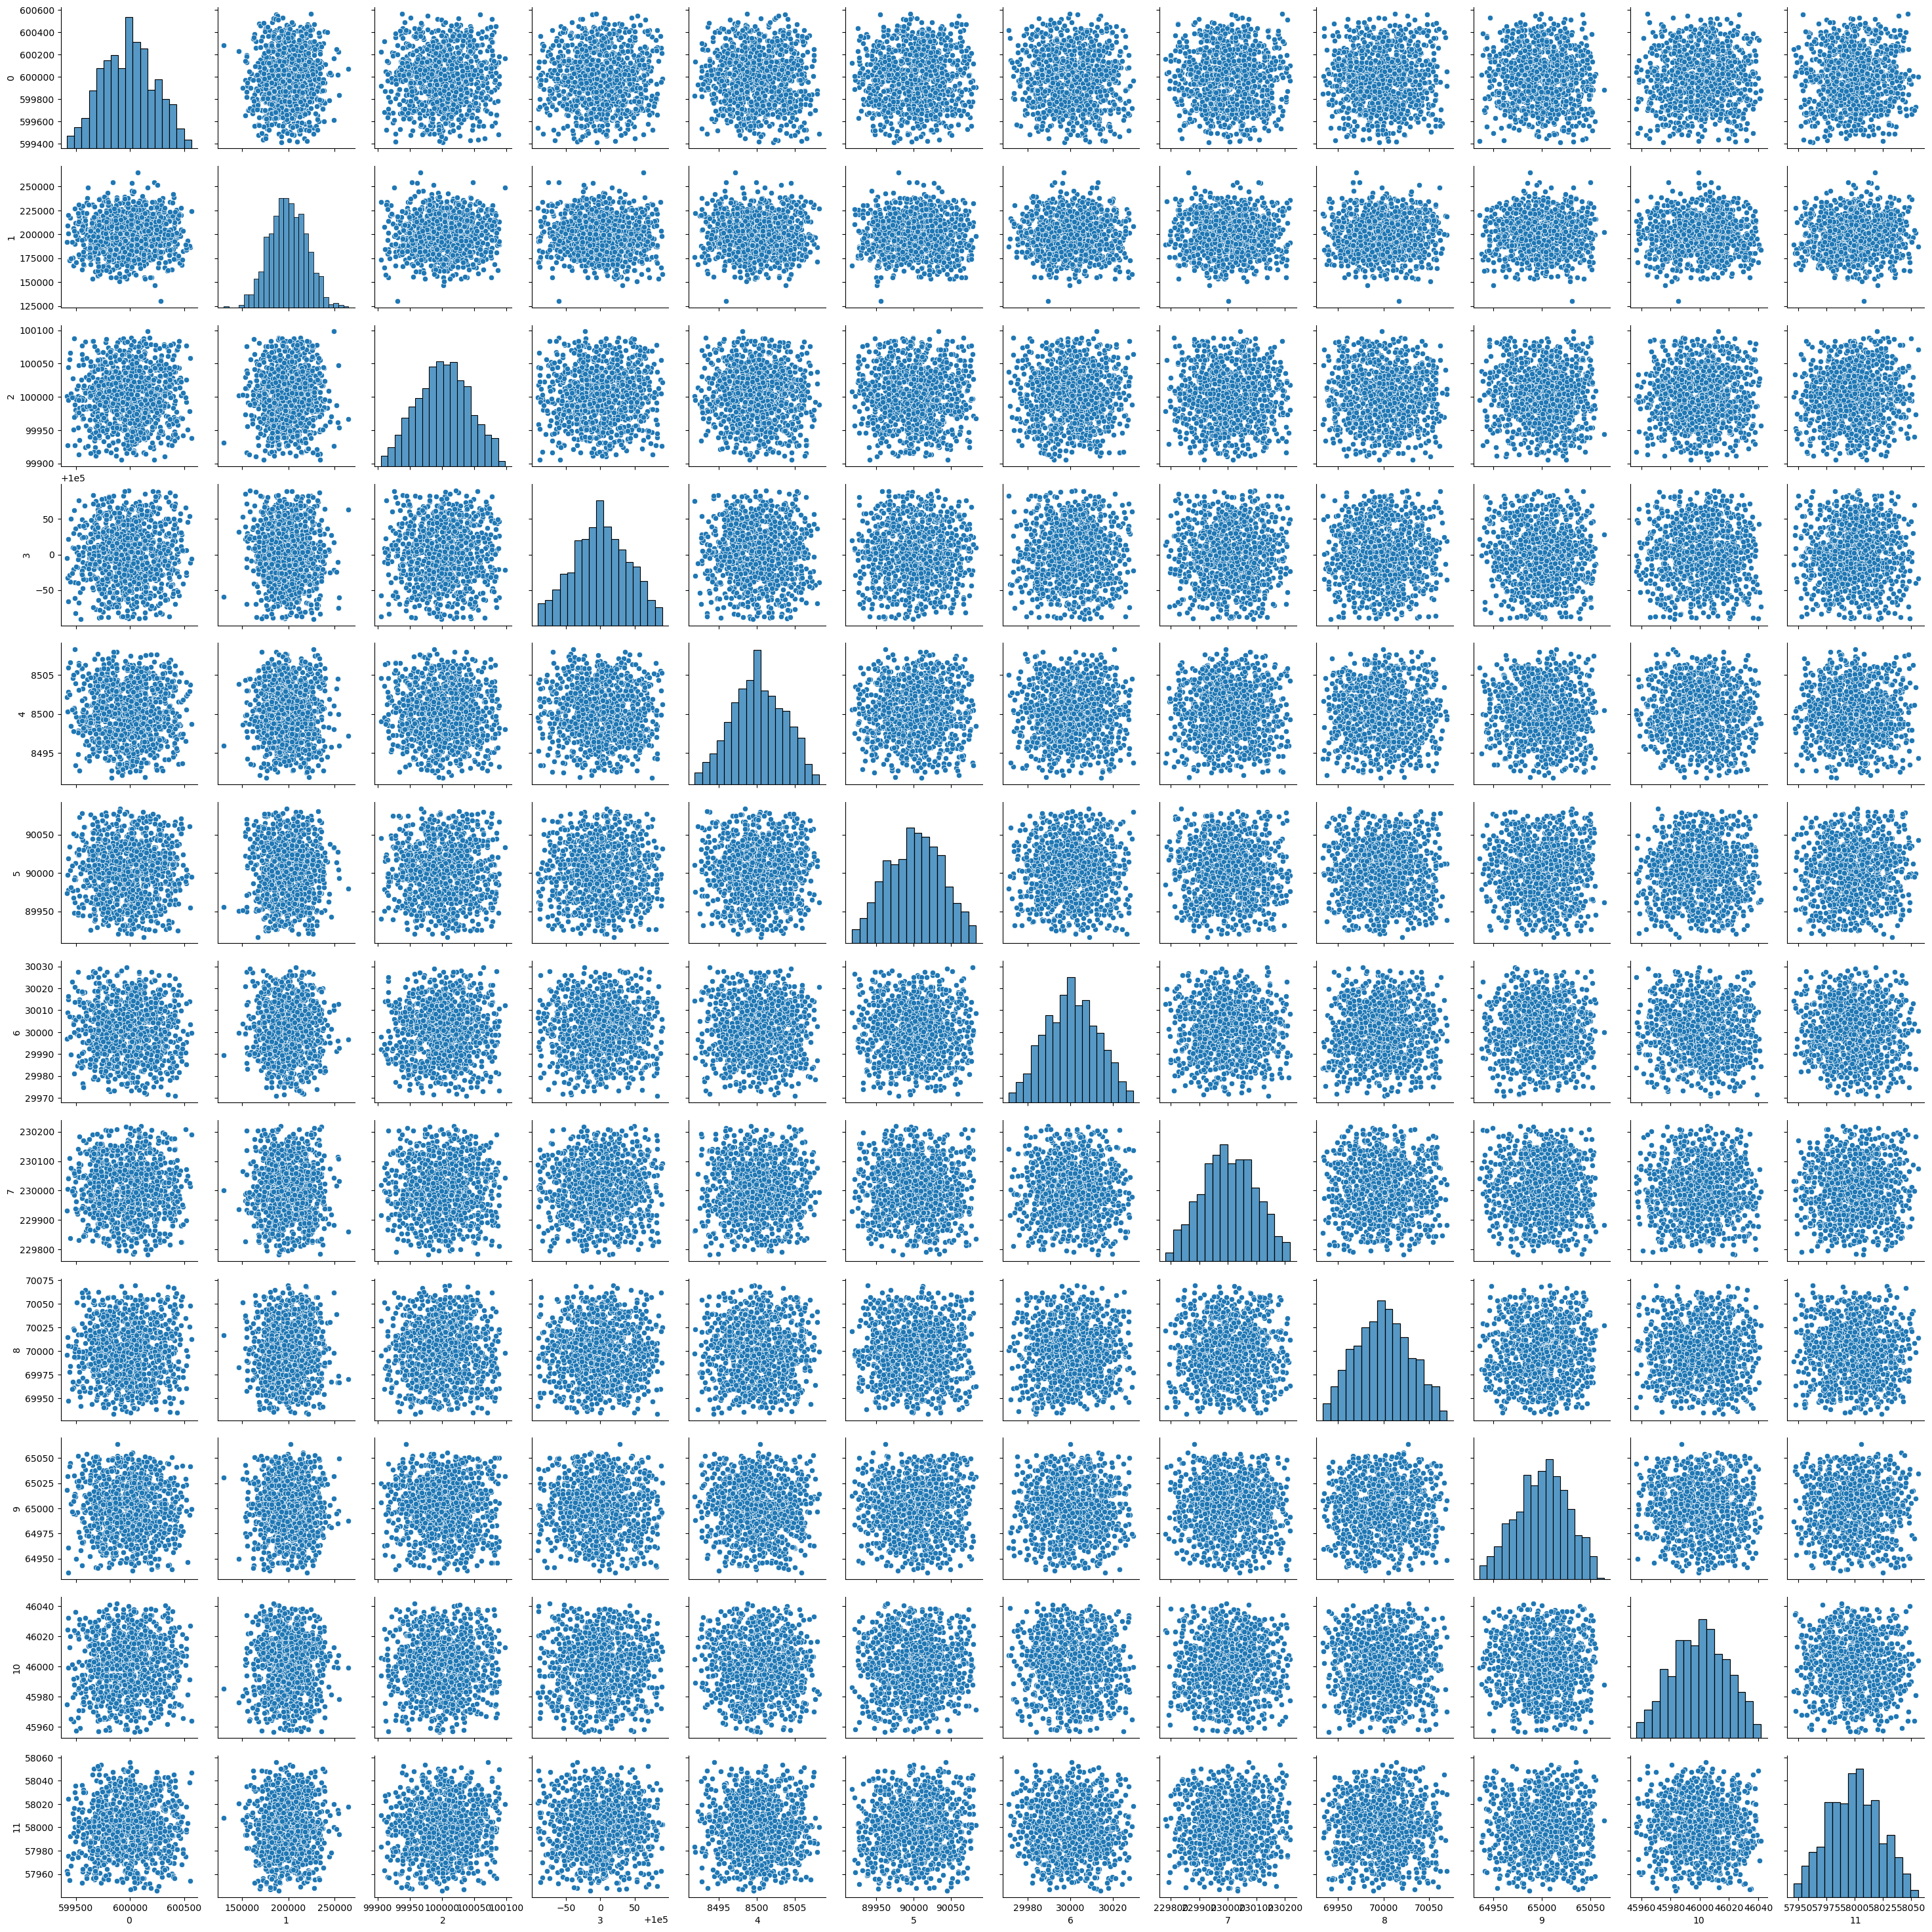

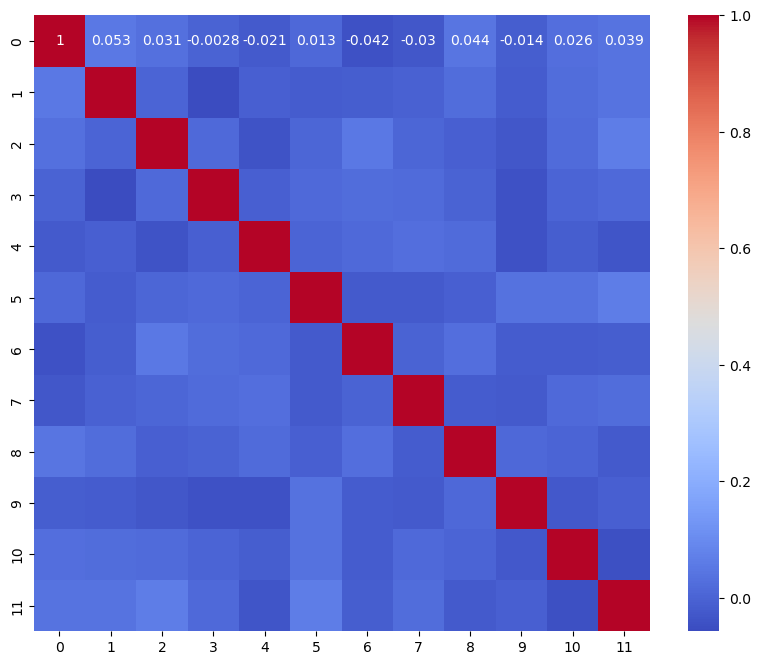

In [131]:
# Análisis de correlaciones
correlaciones = resultados.corr()

# Mostrar matriz de correlaciones
print(correlaciones)

# Gráfico de dispersión
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(resultados)
plt.show()


# Gráfico de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', square=True)
plt.show()
